In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import gaussian_kde
import pandas as pd
from matplotlib.patches import Patch
from pylab import *
from matplotlib.lines import Line2D
import math
from scipy.interpolate import make_interp_spline, BSpline
from scipy.spatial import ConvexHull, convex_hull_plot_2d
%matplotlib inline
import sys
sys.path.insert(0,'C:/Users/rragodos/AppData/Local/Packages/CanonicalGroupLimited.UbuntuonWindows_79rhkp1fndgsc/LocalState/rootfs/home/rj/DRL/')

In [2]:
def minmaxY(X, Y, rulemin, rulmax):
    
    try:
        minY = min([Y[i] for i in range(len(Y)) if X[i] < 10])
        minX = np.argmin([Y[i] for i in range(len(Y)) if X[i] < 10])
    except:
        print('no rules less than 10')
        minY = 9999999
    try:
        maxY = max([Y[i] for i in range(len(Y)) if X[i] < 10])
    except:
        print('no rules less than 10')
        maxY = 0
    return (minY, X[minX])

def get_unique(X, Y):
    xnew = []
    ynew = []

    for x in X:
        if x not in xnew:
            xnew.append(x)
            ynew.append(min([Y[i] for i in range(len(Y)) if X[i] == x]))

    xnew, ynew = zip(*sorted(zip(xnew, ynew)))
    M5X = list(xnew)
    M5Y = list(ynew)


    return (xnew, ynew)

from scipy.spatial import ConvexHull
def lineside(x,y, x1,y1,x2,y2):
    return (y2-y1)*(x2 - x)-(x2-x1)*(y2 - y)

def convexcurve(xlist,ylist):
    xlist = np.array(xlist)
    ylist = -np.array(ylist)
    if len(xlist)== 0 or len(xlist)!=len(ylist):
        return [],[],[]
    hull =ConvexHull(np.array([[x,y] for x,y in zip(xlist,ylist)] ))
    ind = np.argsort(xlist[hull.vertices])
    index = hull.vertices[ind]
    rm = []
    while True:
        flag = True
        for i in range(len(index)-1):
            #             (x−x1)(y2−y1)−(y−y1)(x2−x1)
            for v in index:
                if lineside(xlist[v],ylist[v],xlist[index[i]],ylist[index[i]],xlist[index[i+1]],ylist[index[i+1]] )>0:
                    if index[i] not in rm:
                        rm.append(index[i+1])
                        flag = False
                        break
        if len(rm)==0 or flag:
            break
        else:
            index = [x for x in index if x not in rm]
    return xlist[index],-1*ylist[index],index

dataset:  PRSAp
sirus row:  [1.         0.91013835]
sirus row:  [2.         0.91013835]
sirus row:  [3.         0.89040384]
sirus row:  [4.         0.91013835]
sirus row:  [5.         0.89040384]
sirus row:  [6.         0.89935586]
sirus row:  [7.         0.86707422]
sirus row:  [8.         0.86710674]
sirus row:  [9.        0.8671062]
sirus row:  [10.          0.86591154]
sirus row:  [11.          0.86585814]
sirus row:  [12.          0.85315447]
sirus row:  [13.          0.86602795]
sirus row:  [14.          0.85336624]
sirus row:  [15.          0.85027578]
sirus row:  [16.          0.83220702]
sirus row:  [17.          0.82847627]
sirus row:  [18.          0.84605039]
sirus row:  [19.          0.84258797]
sirus row:  [20.          0.84259204]
sirus row:  [21.          0.84414388]
sirus row:  [22.          0.84414256]
sirus row:  [23.          0.84500279]
sirus row:  [24.         0.8422072]
sirus row:  [25.          0.84330685]
sirus row:  [26.          0.84275816]
sirus row:  [27.  

sirus row:  [1.         0.99133336]
sirus row:  [2.        0.9726148]
sirus row:  [3.         0.97149022]
sirus row:  [4.         0.96904811]
sirus row:  [5.         0.96872311]
sirus row:  [6.         0.96635529]
sirus row:  [7.         0.96233957]
sirus row:  [8.         0.95591653]
sirus row:  [9.         0.95690786]
sirus row:  [10.         0.9481172]
sirus row:  [11.         0.9499024]
sirus row:  [12.          0.94542264]
sirus row:  [13.          0.94708803]
sirus row:  [14.          0.94560745]
sirus row:  [15.          0.94501245]
sirus row:  [16.          0.94598807]
sirus row:  [17.          0.93836814]
sirus row:  [18.          0.93712587]
sirus row:  [19.         0.9360034]
sirus row:  [20.          0.93785748]
sirus row:  [21.          0.93495161]
sirus row:  [22.          0.93396219]
sirus row:  [23.          0.93603287]
sirus row:  [24.          0.93454838]
sirus row:  [25.          0.93627235]
sirus row:  [26.          0.93100986]
sirus row:  [27.          0.93563318]


sirus row:  [1.         0.57208888]
sirus row:  [2.         0.48271074]
sirus row:  [3.         0.39858102]
sirus row:  [4.         0.35769769]
sirus row:  [5.         0.35544444]
sirus row:  [6.        0.3304031]
sirus row:  [7.         0.33042536]
sirus row:  [8.         0.31052164]
sirus row:  [9.         0.31128322]
sirus row:  [10.          0.31120112]
sirus row:  [11.          0.29378221]
sirus row:  [12.          0.30545829]
sirus row:  [13.          0.30142016]
sirus row:  [14.          0.28878488]
sirus row:  [15.          0.28477097]
sirus row:  [16.          0.28072719]
sirus row:  [17.          0.28068921]
sirus row:  [18.         0.2861311]
sirus row:  [19.         0.2856769]
sirus row:  [20.          0.28371624]
sirus row:  [21.          0.26989788]
sirus row:  [22.          0.28714022]
sirus row:  [23.          0.27071752]
sirus row:  [24.          0.27136643]
sirus row:  [25.          0.31291928]
sirus row:  [26.          0.27172538]
sirus row:  [27.          0.25508065

dataset PRSAp (2.0, 8.0, 32.0) (0.9144236766578231, 0.8189514677101839, 0.6959645527135159)
SirusX [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0]
SirusY [0.9101383548936329, 0.9101383548936329, 0.890403841022736, 0.9101383548936329, 0.890403841022736, 0.8993558606307149, 0.86707

dataset gridp (2.0, 4.0, 8.0, 16.0, 32.0, 64.0) (0.9033672487371582, 0.7920242274265641, 0.6704497825482577, 0.6066273238415238, 0.5096784148585992, 0.40832306916373096)
SirusX [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0]
SirusY [0.9039068533624419, 0.9124312883477409, 0.8782720353313491, 0.836250

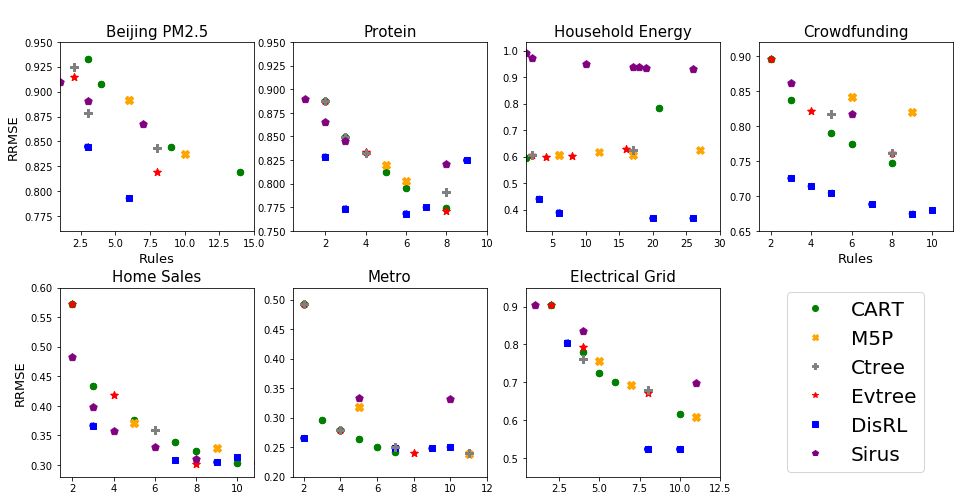

In [5]:

import os

os.chdir('C:/Users/rragodos/AppData/Local/Packages/CanonicalGroupLimited.UbuntuonWindows_79rhkp1fndgsc/LocalState/rootfs/home/rj/DRL/')

from pylab import rcParams
rcParams['figure.figsize'] = (16,8)
msize = 40                                                                                                                                                               

#get DRL results
DRLdf = pd.read_csv('interpres/drlres.csv')
DRLdf1 = pd.read_csv('DRLres/round6.csv')
datadict = {}
datasets = ['PRSAp', 'CASP', 'energyp', 'crowdfundingp', 'Housing', 'Metrop', 'gridp']
# Variances needed to compute RRMSE
markers = {'drl':'s', 'CART': 'o', 'M5': 'X', 'Ctree':'P', 'Evtree':'*', 'Sirus':'p'}
vardict = {'PRSAp':8515.817, 'CASP':37.28, 'CBM':59.13, 'energyp':23300.73, 'crowdfundingp':1842190384.68, 'Housing':5501451264.459, 'Metrop':4127816.378, 'gridp':0.00131775932531724}

#GET DRL Data from file 1
for i in range(DRLdf.shape[0]):
    row = DRLdf.iloc[[i]]
    row = (np.asarray(row)).flatten()
    key=row[0]

    if key in datasets:
        if key != 'Housing' or (key == 'Housing' and row[-1]/vardict[key] > .3):
            if key not in datadict.keys():
                #USED TO BE ROOTED
                datadict[key] = [(row[1], row[-1]/vardict[key])]
            else:
                datadict[key] += [(row[1], row[-1]/vardict[key])]

# GET DRL data from file 2
for i in range(DRLdf1.shape[0]):
    row = DRLdf1.iloc[[i]]
    row = (np.asarray(row)).flatten()
    key = row[0]
    if key in datasets:
        if key not in datadict.keys():
            datadict[key] = [(row[2], row[-2]/vardict[key])]
        else:
            datadict[key] += [(row[2], row[-2]/vardict[key])]
        

CARTdict = {}
M5Pdict = {}
Ctreedict = {}
Evdict = {}
Sirusdict = {}

# GET data for other baselines
for dataset in datasets:   #GET CART
    print('dataset: ', dataset)
    CARTdf = pd.read_csv('interpres/'+dataset+"_cartNEW.csv")
    CARTdict[dataset] = []
    for i in range(CARTdf.shape[0]):
        row = CARTdf.iloc[[i]]
        row = (np.asarray(row)).flatten()
        CARTdict[dataset] += [(row[0], row[2]**2 / vardict[dataset])]

        

    M5df = pd.read_csv('interpres/'+dataset+"_M5PNew.csv")
    M5Pdict[dataset] = []
    for i in range(M5df.shape[0]):
        row = M5df.iloc[[i]]
        row = (np.asarray(row)).flatten()
        M5Pdict[dataset] += [(row[2], row[1]**2 / vardict[dataset])]


    Ctreedf = pd.read_csv('interpres/'+dataset+"_ctree.csv")
    Ctreedict[dataset] = []
    for i in range(Ctreedf.shape[0]):
        row = Ctreedf.iloc[[i]]
        row = (np.asarray(row)).flatten()
        Ctreedict[dataset] += [(row[2], row[1]**2 / vardict[dataset])]
        #print((row[2], row[1]**2 / vardict[dataset]))
        
    
    Evdf = pd.read_csv('interpres/'+dataset+"_evtree3.csv")
    Evdict[dataset] = []
    for i in range(Evdf.shape[0]):
        row = Evdf.iloc[[i]]
        row = (np.asarray(row)).flatten()
        Evdict[dataset] += [(row[2], row[1]**2 / vardict[dataset])]
        
    Sirusdf = pd.read_csv('interpres/'+dataset+"_sirus.csv")
    Sirusdict[dataset] = []
    for i in range(Sirusdf.shape[0]):
        row = Sirusdf.iloc[[i]]
        row = (np.asarray(row)).flatten()
        Sirusdict[dataset] += [(row[0], row[1])]
        
fig,axs = plt.subplots(2,4)
((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))=axs
axs = axs.flatten()
# fig.suptitle('Number of Rules vs RRMSE', fontsize = 24)

carthex = 'green'#'#aec6cf'#'#d248a2'
m5hex = 'orange'#'#ffb347'#'#8b48d2'
ctreehex = 'grey'# '#aaa196'#'#91bf66'
drlhex = 'blue'# '#ff6961'#'#f2c119'
cubisthex = '#36c5d6'
evhex = 'red'
sirushex = 'purple'

smooth = False 
for j, dataset in enumerate(datasets):
    DRLX = np.array([datadict[dataset][i][0] for i in range(len(datadict[dataset])) if datadict[dataset][i][0]>=2])
    DRLY = np.array([datadict[dataset][i][1] for i in range(len(datadict[dataset])) if datadict[dataset][i][0]>=2])
    if dataset == 'CASP' or dataset =='crowdfundingp' or dataset == 'Housing' or dataset =='gridp':
        ind = np.where(DRLX<=10)[0]
        DRLX = DRLX[ind]
        DRLY = DRLY[ind]
    for i in range(len(DRLY)):
        xs = [k for k in range(len(DRLX)) if DRLY[k] == DRLY[i]]
        ycoords = [DRLY[k] for k in range(len(DRLY)) if DRLX[k] == DRLX[i]]
        for k in xs:
            DRLY[k] = min(ycoords)

    DRLX, DRLY = get_unique(DRLX, DRLY)
    DRLX, DRLY, idx = convexcurve(DRLX, DRLY)
    
    if len(DRLX) > 2 and smooth:
        xnew = np.linspace(min(DRLX), max(DRLX), 300)
        spl = make_interp_spline(np.array(DRLX), np.array(DRLY), k=1)
        drlsmooth = spl(xnew)
        axs[j].plot(xnew, drlsmooth, c=drlhex, linestyle = '-.')#, marker = markers['drl'],s = msize)
    else:
        axs[j].scatter(DRLX,DRLY,c=drlhex,linestyle = '-.')#, marker = markers['drl'],s = msize)

    drlcoords = [(DRLX[i], DRLY[i]) for i in range(len(DRLX))]
        
    CARTX = [CARTdict[dataset][i][0] for i in range(len(CARTdict[dataset]))]
    CARTY = [CARTdict[dataset][i][1] for i in range(len(CARTdict[dataset]))]
    CARTX,CARTY = get_unique(CARTX, CARTY)
    CARTX, CARTY, idx = convexcurve(CARTX, CARTY)
    axs[j].scatter(CARTX, CARTY,c=carthex,marker=markers['CART'],label='CART',s=msize)

    if len(CARTX) > 2 and dataset not in ['CASP', 'crowdfundingp'] and smooth:
        xnew = np.linspace(min(CARTX), max(CARTX), 600)
        spl = make_interp_spline(np.array(CARTX), np.array(CARTY), k=1)
        cart_smooth = spl(xnew)
        axs[j].scatter(xnew, cart_smooth, c=carthex,marker = markers['CART'], s = msize)
    else:
        axs[j].scatter(CARTX,CARTY,c=carthex,marker = markers['CART'],s = msize)

    
    M5X = [M5Pdict[dataset][i][0] for i in range(len(M5Pdict[dataset]))]
    M5Y = [M5Pdict[dataset][i][1] for i in range(len(M5Pdict[dataset]))]
    axs[j].scatter(M5X, M5Y,c=m5hex, marker=markers['M5'],label='M5P',s=msize*1.5)
    M5X, M5Y = get_unique(M5X, M5Y)
    if len(M5X) > 2:
        M5X, M5Y, idx = convexcurve(M5X, M5Y)
    
    if len(M5X) > 2 and smooth:
        xnew = np.linspace(min(M5X), max(M5X), 300)
        spl = make_interp_spline(np.array(M5X), np.array(M5Y), k=1)
        m5smooth = spl(xnew)
        axs[j].scatter(xnew, m5smooth, c=m5hex, s = msize*1.5,marker = markers['M5'])
    else:
        axs[j].scatter(M5X, M5Y,c=m5hex,s = msize*1.5,marker = markers['M5'])

        
    CtreeX = [Ctreedict[dataset][i][0] for i in range(len(Ctreedict[dataset]))]
    CtreeY = [Ctreedict[dataset][i][1] for i in range(len(Ctreedict[dataset]))]
    if len(CtreeX) > 2:
        CtreeX, CtreeY = get_unique(CtreeX, CtreeY)
        CtreeX, CtreeY, idx = convexcurve(CtreeX, CtreeY)
    if dataset != 'CBM':
       
        CtreeX, CtreeY = get_unique(CtreeX, CtreeY)
       
    if 'energy' in dataset:
    if len(CtreeX) > 2 and smooth:
        xnew = np.linspace(min(CtreeX), max(CtreeX), 300)
        spl = make_interp_spline(np.array(CtreeX), np.array(CtreeY), k=1)
        ctreesmooth = spl(xnew)
        axs[j].scatter(xnew, ctreesmooth, c=ctreehex, s = msize*2.0,marker = markers['Ctree'])
    else:
        axs[j].scatter(CtreeX, CtreeY,c=ctreehex, s = msize*2.0,marker = markers['Ctree'])

    
    axs[j].scatter(DRLX, DRLY,c=drlhex,marker=markers['drl'],label='DRL',s=msize)
    axs[j].scatter(CtreeX, CtreeY,c=ctreehex, marker=markers['Ctree'],label='Ctree',s=msize*1.5)

    ###########################################################################
    
    EvX = [Evdict[dataset][i][0] for i in range(len(Evdict[dataset]))]
    EvY = [Evdict[dataset][i][1] for i in range(len(Evdict[dataset]))]
    if len(EvX) > 2:
        EvX, EvY = get_unique(EvX, EvY)
        EvX, EvY, idx = convexcurve(EvX, EvY)
    if dataset != 'CBM':
       
        EvX, EvY = get_unique(EvX, EvY)
       
    if len(EvX) > 2 and smooth:
        xnew = np.linspace(min(EvX), max(EvX), 300)
        spl = make_interp_spline(np.array(EvX), np.array(EvY), k=1)
        evsmooth = spl(xnew)
        axs[j].scatter(xnew, evsmooth, c=evhex, s = msize*1.5,marker = markers['Evtree'])
    else:
        axs[j].scatter(EvX, EvY,c=evhex, s = msize*1.5,marker = markers['Evtree'])

    
    axs[j].scatter(EvX, EvY,c=evhex, marker=markers['Evtree'],label='Evtree',s=msize*1.5)
    
    axs[j].scatter(CtreeX, CtreeY,c=ctreehex, marker=markers['Ctree'],label='Ctree',s=msize*1.5)
    print('dataset', dataset, EvX, EvY)
    
    ####################################################
    #SIRUS
    SirusX = [Sirusdict[dataset][i][0] for i in range(len(Sirusdict[dataset]))]
    SirusY = [Sirusdict[dataset][i][1] for i in range(len(Sirusdict[dataset]))]
    print('SirusX', SirusX)
    print('SirusY', SirusY)
    SirusX, SirusY = get_unique(SirusX, SirusY)
    SirusX, SirusY, idx = convexcurve(SirusX, SirusY)
    axs[j].scatter(SirusX, SirusY,c=sirushex, marker=markers['Sirus'],label='Sirus',s=msize*1.5)

    axs[j].set_xlim([1,30])

    if dataset in ['PRSAp', 'CASP', 'Housing', 'crowdfundingp', 'Metrop']:
        axs[j].set_xlim([1,15])
    if dataset =='gridp':
        axs[j].set_xlim([.4,12.5])
        axs[j].set_ylim([.45,.95])
    if dataset == 'CASP':
        axs[j].set_xlim([.4,10])
        axs[j].set_ylim([.75,.95])
    if dataset == 'CBM':
        axs[j].set_xlim([.4,10])
        axs[j].set_ylim([-.005,.3])
    if dataset == 'PRSAp':
        axs[j].set_ylim([.76, .95])
    if dataset in ['Metrop']:
        axs[j].set_xlim([1.4, 12])
        axs[j].set_ylim([.2,.52])
    if dataset in ['crowdfundingp']:
        axs[j].set_xlim([1.4, 11])
        axs[j].set_ylim([.65,.92])
    if dataset in ['Housing']:
        axs[j].set_xlim([1.4,10.8])
        axs[j].set_ylim([.28, .6])


    rulemin, rulemax, rrmsemin, rrmsemax = axs[j].axis()
    rulemin, rulemax = 0, 20
    mincart, cartnrule = minmaxY(CARTX, CARTY, rulemin, rulemax)
    minm5, m5nrule = minmaxY(M5X, M5Y, rulemin, rulemax)
    minDRL, DRLnrule = minmaxY(DRLX, DRLY, rulemin, rulemax)
    minCtree, ctreenrule = minmaxY(CtreeX, CtreeY, rulemin, rulemax)
    minEvtree, evtreenrule = minmaxY(EvX, EvY, rulemin, rulemax)
    print('\ndataset: ', dataset)
    print('CART: ', mincart, cartnrule)#minmaxY(CARTX, CARTY, 0, 20))
    print('M5: ', minm5, m5nrule)# minmaxY(M5X, M5Y, 0, 20))
    print('DRL: ', minDRL, DRLnrule)#minmaxY(DRLX, DRLY, 0, 20))
    print('Ctree: ', minCtree, ctreenrule)#minmaxY(CtreeX, CtreeY, 0, 20))
    print('Evtree: ', minEvtree, evtreenrule)#minmaxY(EvX, EvY, 0, 20))

    names = ['cart', 'm5', 'drl', 'ctree', 'evtree']
    rrmses = [mincart,minm5,minDRL,minCtree, minEvtree]
    rules = [cartnrule, m5nrule, DRLnrule, ctreenrule, evtreenrule]
    print('dataset, minRRMSE, minRules: ',
          dataset,
          names[np.argmin(rrmses)],
          min(rrmses),
          rules[np.argmin(rrmses)])
    
    axs[j].set_title(dataset)
    if dataset == 'PRSAp':
        axs[j].set_title('Beijing PM2.5', fontsize = 15)
        axs[j].set_ylabel('RRMSE',fontsize=13)
        axs[j].set_xlabel('Rules\n',fontsize=13)
    if dataset == 'CASP':
        axs[j].set_title('Protein', fontsize = 15)
    if dataset == 'crowdfundingp':
        axs[j].set_title('\nCrowdfunding', fontsize = 15)
        
        axs[j].set_xlabel('Rules\n',fontsize=13)
    if dataset == 'gridp':
        axs[j].set_title('Electrical Grid', fontsize = 15)
    if dataset == 'Metrop':
        axs[j].set_title('Metro', fontsize = 15)
    if dataset == 'energyp':
        axs[j].set_title('Household Energy', fontsize = 15)
    if dataset == 'Housing':
        axs[j].set_title('Home Sales', fontsize = 15)
        axs[j].set_ylabel('RRMSE',fontsize=13)
    if dataset == 'CBM':
        axs[j].set_title('Naval Propulsion', fontsize = 18)

legend_elts = [Line2D([0],[0],color=carthex,label='CART',marker=markers['CART'],linestyle='None'),
               Line2D([0],[0],marker=markers['M5'],color=m5hex,label='M5P',markerfacecolor=m5hex,linestyle='None'),
               Line2D([0],[0],color=ctreehex,label='Ctree',marker=markers['Ctree'],linestyle='None'),
               
               Line2D([0],[0],color=evhex,label='Evtree',marker='*',linestyle='None'),
               Line2D([0],[0],color=drlhex,label='DisRL',marker=markers['drl'],linestyle='None'),
               Line2D([0],[0],color=sirushex,label='Sirus',marker=markers['Sirus'],linestyle='None')
   
]
axs[7].legend(handles=legend_elts,loc='center',fontsize=20)
axs[7].axis('off')
plt.subplots_adjust(hspace = .3)
plt.show()

    


